# Toward Convolutional Neural Networks

This week, we will build toward the next big idea in neural networks: convolutional neural networks (frequently called CNNs or ConvNets). These are nets that take some inspiration from the way neurons are connected in an animal's visual cortex, where different groups of neurons respond to specific portions of the visual field and then those signals are combined in a sort of hierarchy that is thought to allow animals to extract increasingly complex features within the incoming visual stimuli.

CNNs are are feedforward neural networks like we have seen, but neurons in one layer are not necessarily connected to every neuron in the next layer. Such a more complex architecture, in some sense, allows a regularized version of fully-connected nets in that, they can generalize better to test data and to the real world. Recall, we could learn the whole training set for CIFAR-10 but had at least a 30% less accuracy on test data. Another benefit is that this more sparse sort of structure means we can build deeper or wider neural nets without growing the computation as much as fully-connected nets.

CNNs are some of the best algorithms for image and video recognition problems, but have also been used effectively in anomaly detection, time series analysis in financial markets, and predicting the interactions between proteins and molecules in drug discovery among other applications.

Before we get into this, let's take a look at Keras to ensure our computation is as efficient as possible.

## Using Keras

Since computation is a bottleneck for neural nets, it is worthwhile to learn to construct neural nets with a dedicated deep learning framework rather than simply raw Python with NumPy, as we have used so far, because they allow highly optimized computation accelerated by graphics processing units (GPUs) and let us create nets quickly and easily.

As of now, the most popular solutions are probably Facebook's PyTorch and Google's TensorFlow with Keras. (There are some other solutions like Theano, Caffe, and MXNet as well.) Both have two main parts: (1) highly optimized tensor computing, including matrix multiplication and (2) simple functionality for creating neural networks with optimized backpropagation.

We only use TensorFlow + Keras in the class, but it is good to know these other options exist.

### Writing a Fully-connected Feedforward Neural Net with Keras

We will aim to write a neural net similar to what we have constructed through the course so far. That is, it should feed data forward through a sequence of layers, the layers should be fully connected (dense), and we should use SGD to optimize it. We can import these things directly from Keras.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

Let's construct the net to classify MNIST (our beloved benchmarking dataset).

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/sample - loss: 2.2954 - accuracy: 0.1363 - val_loss: 2.2855 - val_accuracy: 0.2202
Epoch 2/100
60000/60000 [==============================] - 2s 34us/sample - loss: 2.2769 - accuracy: 0.1951 - val_loss: 2.2658 - val_accuracy: 0.2321
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2526 - accuracy: 0.3111 - val_loss: 2.2347 - val_accuracy: 0.4171
Epoch 4/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2122 - accuracy: 0.4481 - val_loss: 2.1821 - val_accuracy: 0.6217
Epoch 5/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.1457 - accuracy: 0.5634 - val_loss: 2.0977 - val_accuracy: 0.5981
Epoch 6/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.0417 - accuracy: 0.6039 - val_loss: 1.9696 - val_accuracy: 0.5775
Epoch 7/100
60000/60000 [=========================

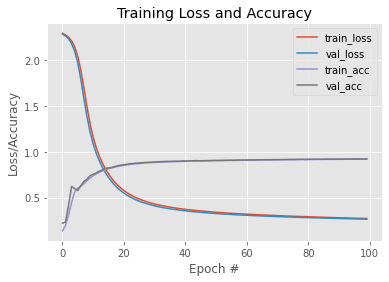

In [19]:
# Create a feedforward neural net
model = Sequential()

# Create the first hidden layer
model.add(Dense(256, input_shape = (784,), activation = "sigmoid"))

# Create the second hidden layer
model.add(Dense(128, activation = "sigmoid"))

# Create the output layer
model.add(Dense(10, activation = "sigmoid"))

model.compile(loss = "categorical_crossentropy", optimizer = SGD(0.01), metrics = ["accuracy"])

### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels

((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

trainX = trainX/255.0
testX = testX/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# fit the model to the training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 128)

print("Validation accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX, batch_size = 128)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [20]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX/255.0
testX = testX/255.0

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="relu"))

# train the model using SGD
print("[INFO] training network...")
model.compile(loss="categorical_crossentropy", optimizer = SGD(0.01), metrics = ["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 600us/sample - loss: 2.7709 - accuracy: 0.1540 - val_loss: 2.1235 - val_accuracy: 0.1339
Epoch 2/100
 6208/50000 [==>...........................] - ETA: 23s - loss: 2.2743 - accuracy: 0.1324

KeyboardInterrupt: 